# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Data Validation
This data set has 947 rows, 8 columns. After validation, there were 895 rows remaining. The following describes what I did to each column:

![image](image.png)


defined a function, explore_dataframe, which conducts exploratory data analysis on a given pandas DataFrame. It displays the first few rows, provides information about data types and non-null counts, presents summary statistics for numerical columns, checks for missing values, and identifies duplicate rows. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def explore_dataframe(df):
    """
    Explore and summarize the given DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    None (prints exploration results)
    """
    # 1. Display the first few rows of the DataFrame
    print("1. Display the first few rows of the DataFrame:")
    print(df.head())

    # 2. Get information about the DataFrame
    print("\n2. Get information about the DataFrame:")
    print(df.info())

    # 3. Summary statistics for numerical columns
    print("\n3. Summary statistics for numerical columns:")
    print(df.describe())

    # 4. Check for missing values
    print("\n4. Check for missing values:")
    print(df.isnull().sum())

    # 5. Check for duplicate rows
    print("\n5. Check for duplicate rows:")
    print(df.duplicated().sum())

In [38]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('recipe_site_traffic_2212.csv')

explore_dataframe(df)

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the missing data information
print("Percentage of Missing Data:")
print(missing_data)


1. Display the first few rows of the DataFrame:
   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]

2. Get information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6 

In [39]:
def compare_lists(list1, list2):
    # Sort the input lists
    sorted_list1 = sorted(list1)
    sorted_list2 = sorted(list2)

    # Compare sorted lists
    are_lists_equal = sorted_list1 == sorted_list2

    # Display the sorted lists and the comparison result
    print("Sorted List 1:", sorted_list1)
    print("Sorted List 2:", sorted_list2)
    print("Are Sorted Lists Equal?", are_lists_equal)

first filled missing values in the 'high_traffic' column with 'Not_High' and then generated separate heatmaps for each subset of a DataFrame sorted by 'category', 'servings', and 'high_traffic'. The heatmaps visually represent the distribution of missing values in other columns within each sorted subset, aiding in the analysis of data completeness.
I replaced the missing data in the 'high_traffic' column with the value 'Not_High,' intending to later convert them into categorical data.
Additionally, after a rigorous examination, I have concluded that the missing data are randomly distributed and do not introduce bias into the results. Since they account for approximately 5 percent of the total dataset, I have opted to eliminate them.

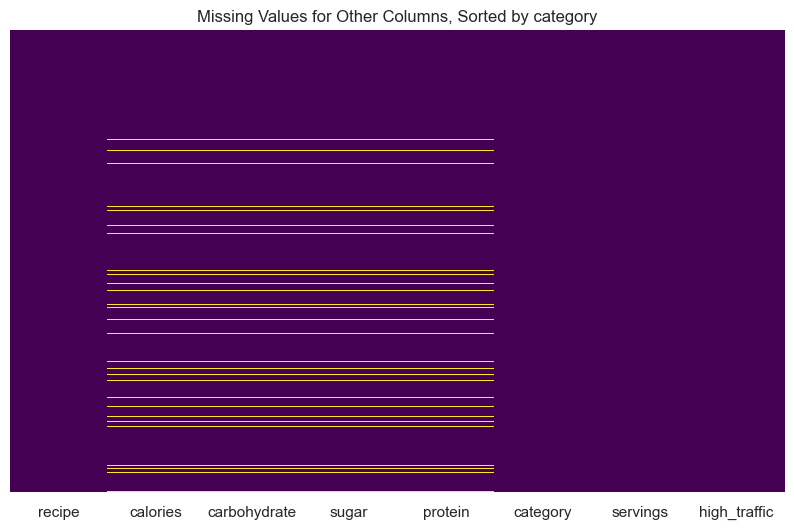

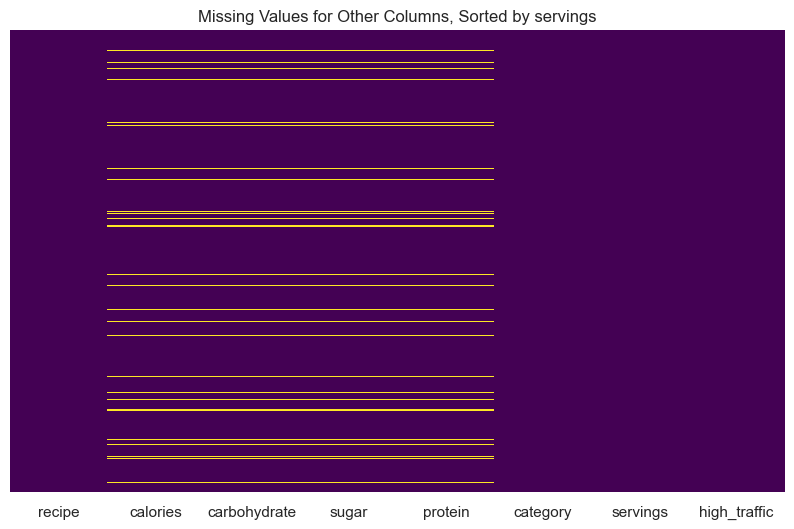

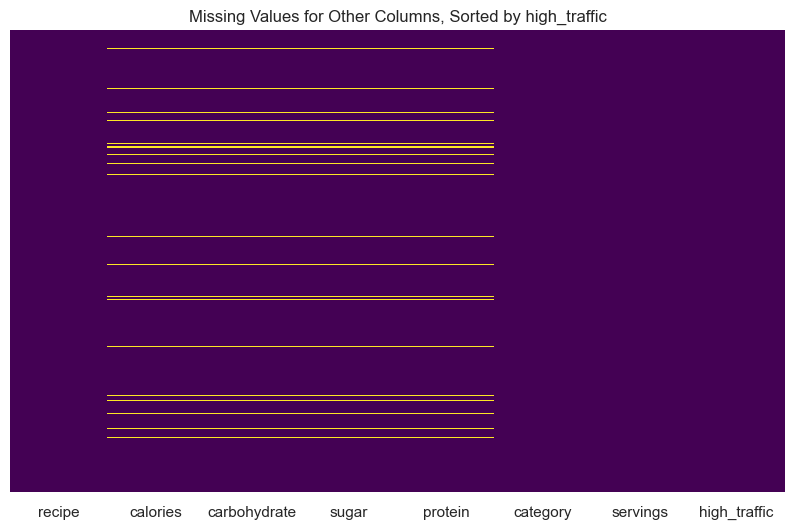

Sorted List 1: ['Beverages', 'Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
Sorted List 2: ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', 'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
Are Sorted Lists Equal? False
Sorted List 1: ['Beverages', 'Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
Sorted List 2: ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', 'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
Are Sorted Lists Equal? False
Unique Values in 'servings' column: ['4' '1' '2' '6' '4 as a snack' '6 as a snack']
Unique Values in 'servings' column: [4 1 2 6]
1. Display the first few rows of the DataFrame:
   recipe  calories  carbohydrate  ...       category  servings high_traffic
1       2     35.48         38.56  ...         Potato         4            1
2       3    914.28         

In [40]:
# Replace missing values in the 'high_traffic' column with 'Not_High'
df['high_traffic'] = df['high_traffic'].fillna('Not_High')
## investigate distributaion of missing values in calories  carbohydrate sugar protein
# Columns to sort by
columns_to_sort_list = ['category', 'servings' , 'high_traffic']

# Plot separate heatmaps for each sorted subset
for column_to_sort in columns_to_sort_list:
    # Sort the DataFrame based on the specified column
    df_sorted = df.sort_values(by=column_to_sort)
    
    # Plot heatmap for missing values in other columns, sorted by the specified column
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_sorted.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(f'Missing Values for Other Columns, Sorted by {column_to_sort}')
    plt.show()
    
# Drop rows with missing values
df = df.dropna()

expected_values = sorted(['Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'])
unique_categories = sorted(df['category'].unique())
compare_lists(expected_values,unique_categories )
#Replace 'Chicken Breast' with 'Chicken' in the 'category' column
#df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

unique_categories = sorted(df['category'].unique())
compare_lists(expected_values,unique_categories )

# Find unique values in the 'servings' column
unique_servings = df['servings'].unique()

# Display the unique values
print("Unique Values in 'servings' column:", unique_servings)

# Replace specific values in the 'servings' column
df['servings'] = df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'})

# Cast the 'servings' column to integers
df['servings'] = df['servings'].astype(int)

# Display the unique values in the 'servings' column
print("Unique Values in 'servings' column:", df['servings'].unique())

##Represent 'Not_High' as 0 and 'High' as 1.
df['high_traffic'] = df['high_traffic'].map({'Not_High': 0, 'High': 1})

explore_dataframe(df)



In the process of refining the Recipe Site Traffic dataset, two key adjustments were made to improve data consistency and integrity. Firstly, occurrences of 'Chicken Breast' in the 'category' column were uniformly replaced with 'Chicken,' aligning the representation of chicken-related categories for improved clarity.
**Later, due to the significant anomaly introduced by the replacement, I decided to stick with the original categories and not substitute 'Chicken Breast' with 'Chicken'.** Additionally, specific values in the 'servings' column, such as '4 as a snack' and '6 as a snack,' were modified to '4' and '6' respectively, providing a standardized format. Simultaneously, the 'servings' column underwent a transformation, casting all entries to integer type, ensuring a consistent and appropriate data type for serving size representation. These refinements contribute to a more standardized and coherent dataset, setting a solid foundation for subsequent analyses or modeling endeavors.

In the data preprocessing phase, the 'high_traffic' column was transformed to facilitate its utilization in machine learning models. The original categorical values, 'Not_High' and 'High,' were mapped to numerical equivalents, where 'Not_High' was encoded as 0, and 'High' was encoded as 1. This conversion allows for a more straightforward integration of the 'high_traffic' feature into machine learning algorithms, as they often operate more efficiently with numerical representations. This binary encoding of 'high_traffic' enables the algorithm to interpret and leverage the information effectively, contributing to a more robust and analytically conducive dataset for subsequent modeling and analysis.

# Exploratory Analysis:
**Target Variable - high_traffic**

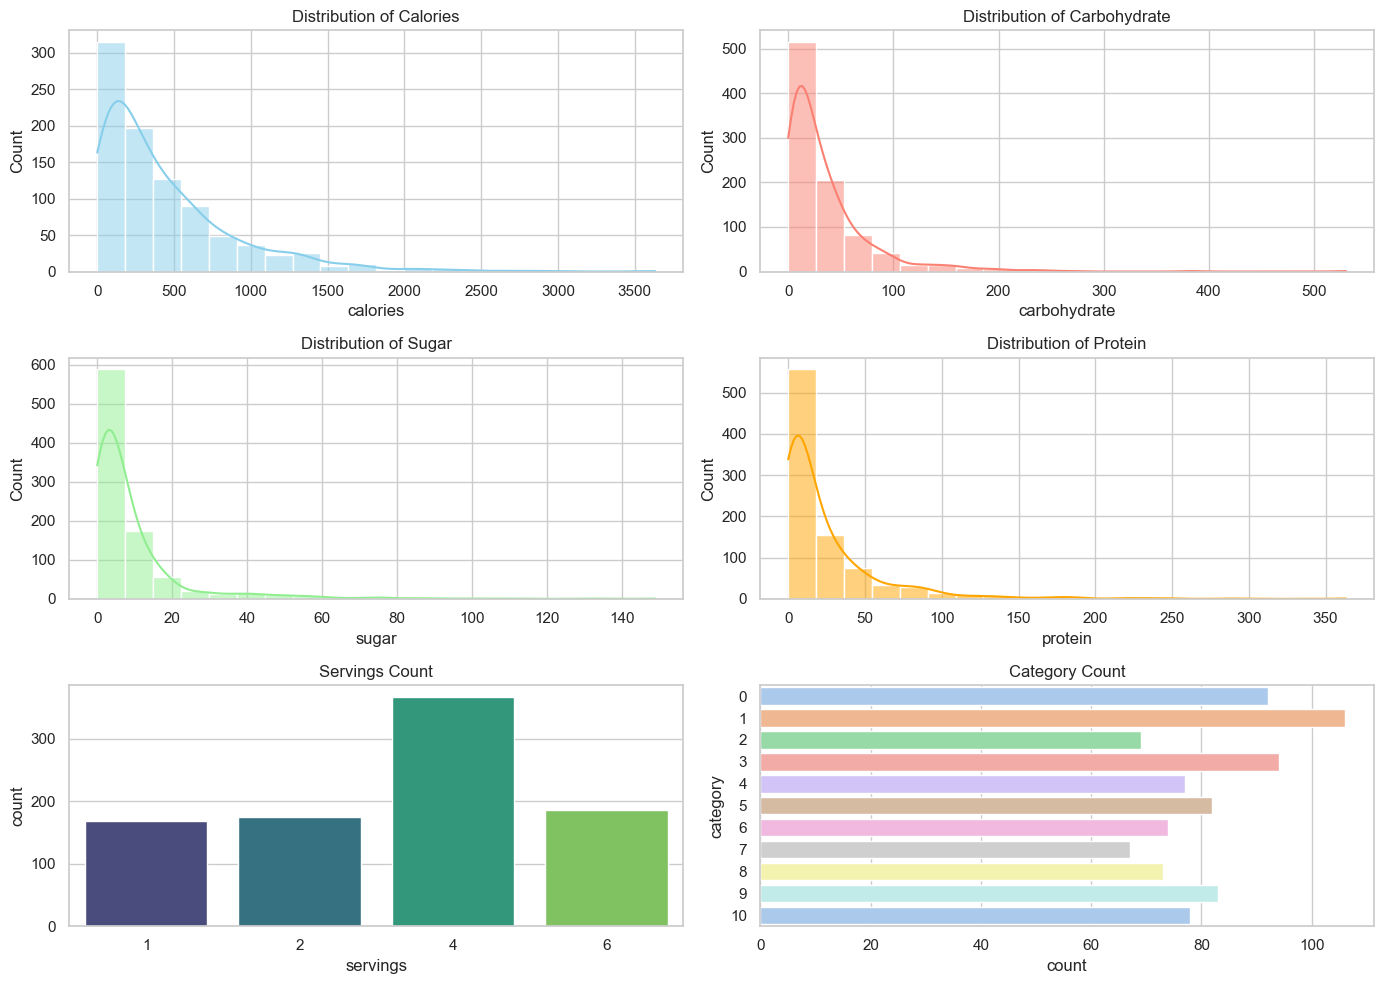

In [50]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plotting single variables
plt.figure(figsize=(14, 10))

# Plot for 'calories'
plt.subplot(3, 2, 1)
sns.histplot(df['calories'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Calories')

# Plot for 'carbohydrate'
plt.subplot(3, 2, 2)
sns.histplot(df['carbohydrate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Carbohydrate')

# Plot for 'sugar'
plt.subplot(3, 2, 3)
sns.histplot(df['sugar'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Sugar')

# Plot for 'protein'
plt.subplot(3, 2, 4)
sns.histplot(df['protein'], bins=20, kde=True, color='orange')
plt.title('Distribution of Protein')

# Plot for 'servings'
plt.subplot(3, 2, 5)
sns.countplot(x='servings', data=df, palette='viridis')
plt.title('Servings Count')

# Plot for 'category'
plt.subplot(3, 2, 6)
sns.countplot(y='category', data=df, palette='pastel')
plt.title('Category Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The distribution plots for calories, carbohydrates, protein, and sugar reveal a rightward skewness, indicating that most recipes lean towards lower quantities of these components. This implies a potential abundance of recipes rich in vegetables and fruits, known for their lower nutritional content in these elements. Consequently, our model is likely to yield better results for such food categories due to the larger dataset available in this region.


Recipes are distributed almost evenly among different categories, ~~with the exception of chicken, which seems to be duplicated~~. This nearly equal distribution indicates a balanced representation of recipes across various categories, while the doubling of chicken instances may be attributed to the consolidation of "Chicken Breast" into the broader "Chicken" category, as mentioned earlier.

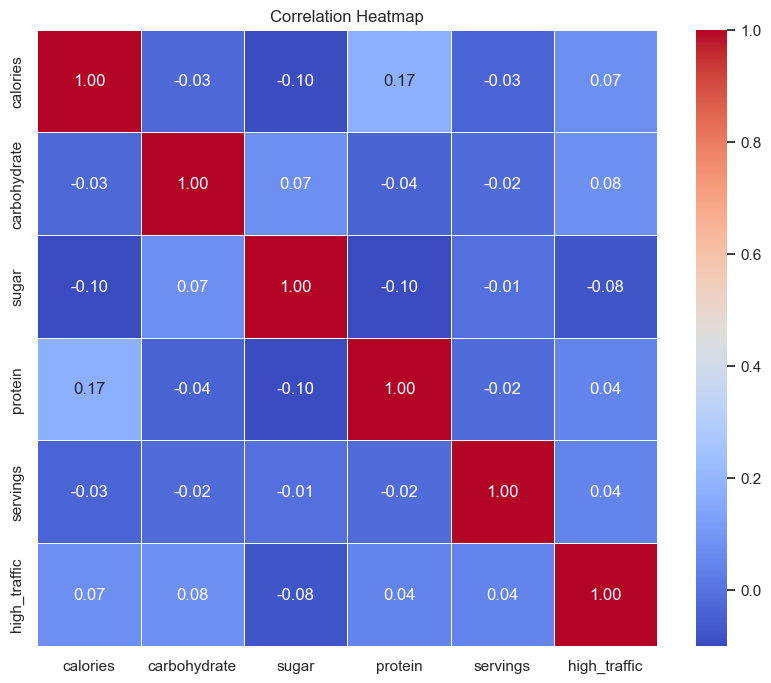

In [42]:

variables = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'high_traffic']

# Calculate the correlation matrix
corr_matrix = df[variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


The heatmap was not very helpful as it did not unveil any significant relationships.

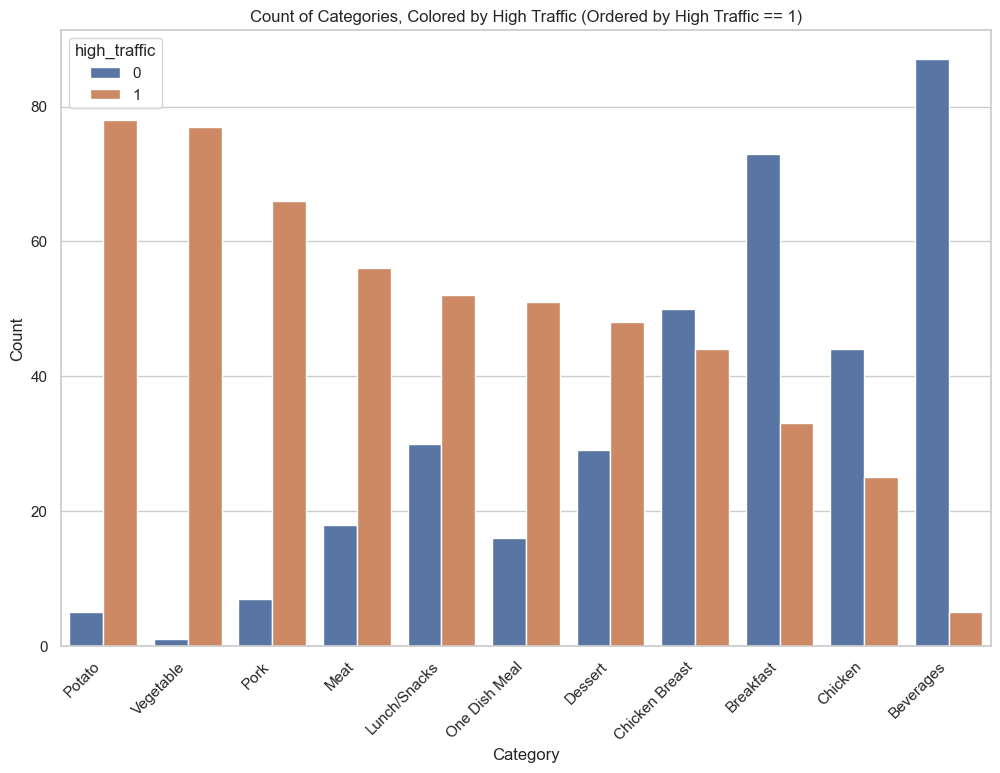

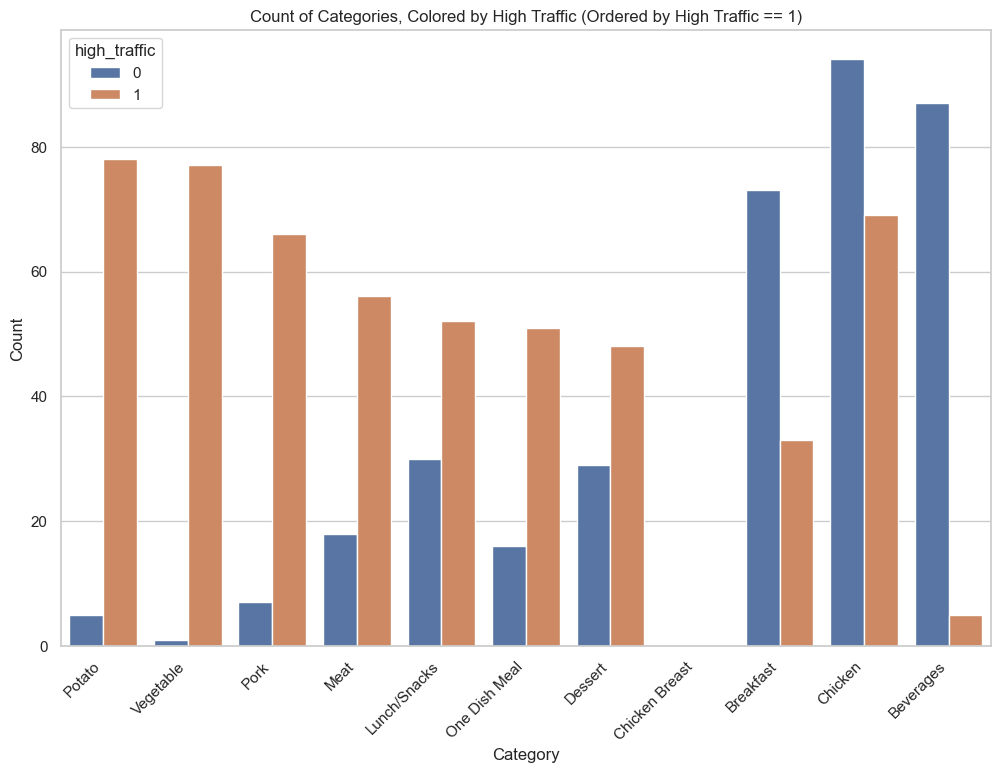

In [43]:
# Get the categories ordered by the count of 'high_traffic' == 1
ordered_categories = df[df['high_traffic'] == 1]['category'].value_counts().index

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a count plot with ordered categories
sns.countplot(x='category', hue='high_traffic', data=df, order=ordered_categories)
plt.title('Count of Categories, Colored by High Traffic (Ordered by High Traffic == 1)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


df_chicken_breast = df.copy()
# Get the categories ordered by the count of 'high_traffic' == 1
ordered_categories = df_chicken_breast[df_chicken_breast['high_traffic'] == 1]['category'].value_counts().index



df_chicken_breast['category'] = df_chicken_breast['category'].replace('Chicken Breast', 'Chicken')
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a count plot with ordered categories
sns.countplot(x='category', hue='high_traffic', data=df_chicken_breast, order=ordered_categories)
plt.title('Count of Categories, Colored by High Traffic (Ordered by High Traffic == 1)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


This count plot illustrating the distribution of recipe categories based on their 'high_traffic' status. The categories are ordered by the count of 'high_traffic' being equal to high, providing insights into the prevalence of high-traffic recipes across different categories. The resulting diagram offers a clear representation of how the occurrence of high-traffic recipes varies across recipe categories.

high_traffic    0    1
servings              
1              70   99
2              76   98
4             147  220
6              67  118
Chi-square value: 2.2042316567646054
P-value: 0.5311153478247259


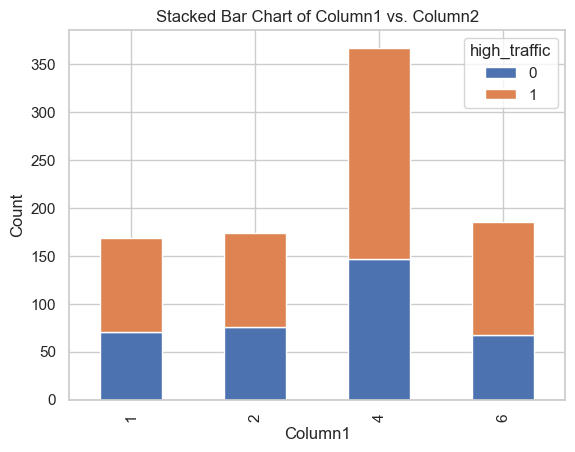

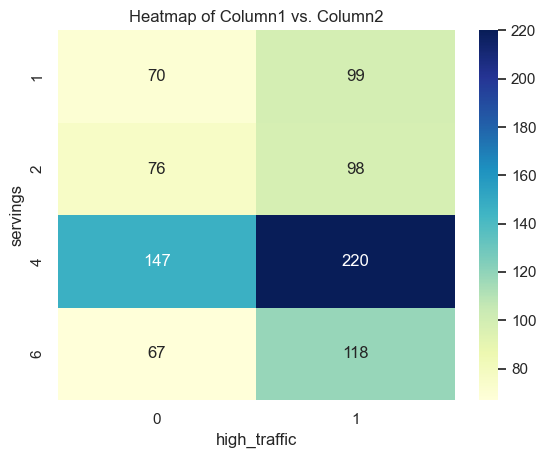

In [44]:

cross_tab = pd.crosstab(df['servings'], df['high_traffic'])
print(cross_tab)

from scipy.stats import chi2_contingency


chi2, p, _, _ = chi2_contingency(cross_tab)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

cross_tab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Column1 vs. Column2')
plt.xlabel('Column1')
plt.ylabel('Count')
plt.show()

heatmap_data = pd.crosstab(df['servings'], df['high_traffic'])
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Column1 vs. Column2')
plt.show()






The code uses a chi-square test to analyze the relationship between 'servings' and 'high_traffic' in a DataFrame. It prints the chi-square value and p-value and visualizes the results with a stacked bar chart and a heatmap. However, the conclusion, as indicated in the comments, is that there is no evident relationship between the two variables.

             calories                          ... protein                 
                count        mean         std  ...     50%      75%     max
high_traffic                                   ...                         
0               360.0  394.883889  423.235082  ...   8.775  29.4425  286.97
1               535.0  463.565196  470.380795  ...  12.030  30.7900  363.36

[2 rows x 32 columns]


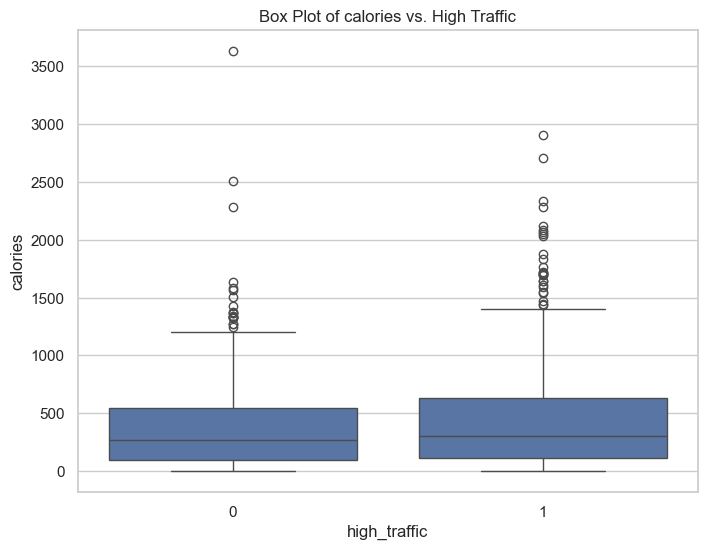

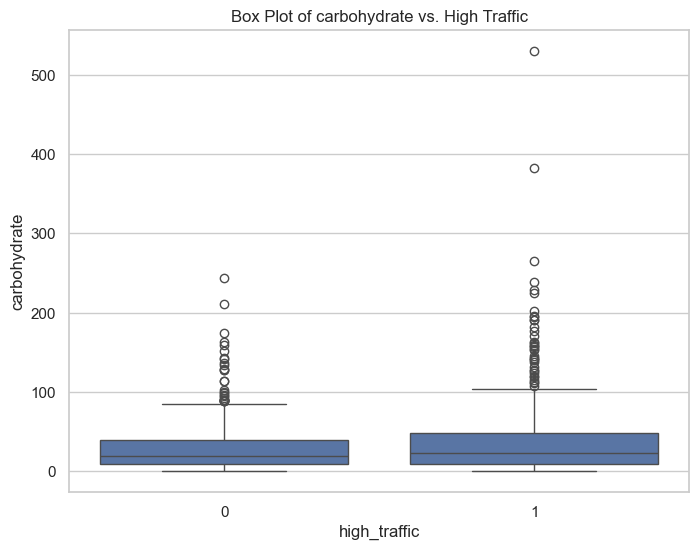

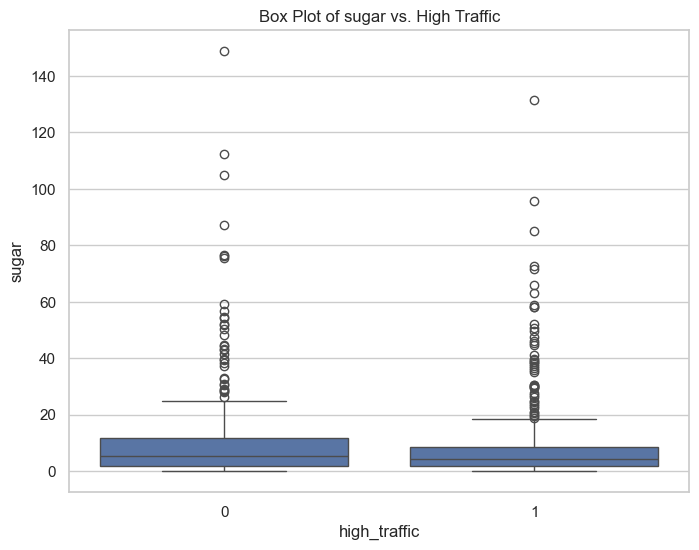

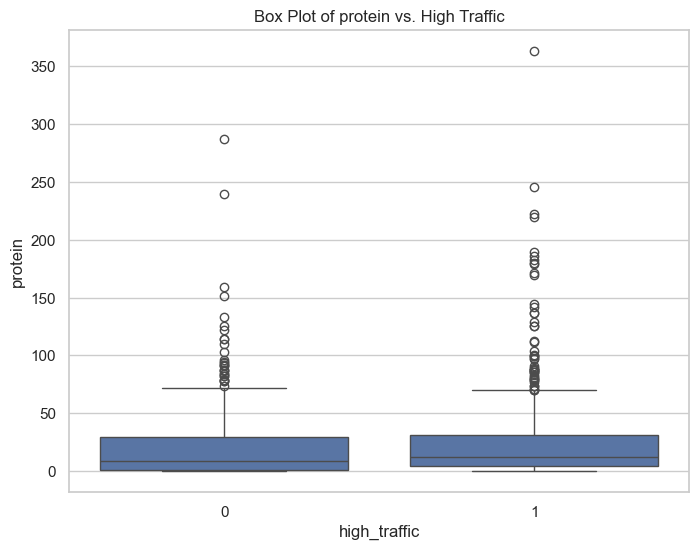

Test for calories:
T-statistic: 2.228940930508691
P-value: 0.026065982071963506

Test for carbohydrate:
T-statistic: 2.4264502002405974
P-value: 0.015444390210209288

Test for sugar:
T-statistic: -2.263444764743869
P-value: 0.023847573817121142

Test for protein:
T-statistic: 1.333363105325693
P-value: 0.18275269423422405



In [45]:

numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']
summary_statistics = df[numerical_columns + ['high_traffic']].groupby('high_traffic').describe()
print(summary_statistics)


for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='high_traffic', y=column, data=df)
    plt.title(f'Box Plot of {column} vs. High Traffic')
    plt.show()

from scipy.stats import ttest_ind
for column in numerical_columns:
    high_traffic_values = df[df['high_traffic'] == 1][column]
    low_traffic_values = df[df['high_traffic'] == 0][column]

    t_stat, p_value = ttest_ind(high_traffic_values, low_traffic_values)
    print(f'Test for {column}:')
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}\n')

    



The results of the t-tests for each numerical column provide information about whether there are significant differences in the means of these columns between the two categories of 'high_traffic'. Let's interpret the results:

Calories:

T-statistic: 2.23
P-value: 0.026
The p-value (0.026) is less than the typical significance level of 0.05. This suggests that there is evidence to reject the null hypothesis, indicating that there is a significant difference in mean calories between the 'high_traffic' categories.

Carbohydrate:

T-statistic: 2.43
P-value: 0.015
Similar to calories, the p-value (0.015) is less than 0.05, indicating a significant difference in mean carbohydrate values between the 'high_traffic' categories.

Sugar:

T-statistic: -2.26
P-value: 0.024
The negative sign of the t-statistic indicates that the mean sugar values are lower in the 'high_traffic' category. The p-value (0.024) is less than 0.05, suggesting a significant difference.

Protein:

T-statistic: 1.33
P-value: 0.183
The p-value (0.183) is greater than 0.05, indicating that there is not enough evidence to reject the null hypothesis for protein. In other words, there is no significant difference in mean protein values between the 'high_traffic' categories.

In summary, based on the p-values:

There are significant differences in mean values for Calories, Carbohydrate, and Sugar between 'high_traffic' categories.
There is no significant difference in mean Protein values between 'high_traffic' categories.

# Model Development


This classification problem is being addressed by evaluating various models, including **Logistic Regression, Random Forest, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and GradientBoostingClassifier**.

**Given the constraints of time and a relatively small dataset, I experimented with all five models. If I were to select only one model, I would opt for the Random Forest. This choice is motivated by its recognized effectiveness in capturing complex relationships within the data.**

Logistic Regression is chosen for its simplicity and interpretability. Random Forest is being considered due to its effectiveness in capturing intricate relationships within the data. Support Vector Machines (SVM) are under evaluation for their ability to handle both linear and non-linear classification challenges. K-Nearest Neighbors (KNN) is explored as a potential model that classifies data points based on their nearest neighbors. Lastly, the GradientBoostingClassifier is considered for its ensemble approach, combining weak learners to create a robust predictive model for the classification task.

## evaluation metrics (Business Metrics)
Precision, recall, and F1 score are relevant metrics in this context:
**Precision**: The proportion of predicted high-traffic recipes that are actually high-traffic. High precision indicates a low rate of false positives.
**Recall**: The proportion of actual high-traffic recipes that are correctly predicted. High recall indicates a low rate of false negatives.
**F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.

In [46]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


numerical_features = ['calories', 'carbohydrate', 'sugar', 'protein']
categorical_features = ['category']
target = 'high_traffic'

# Create an experiment (if it doesn't exist) or get the existing one
experiment_name = "experiment_8"
mlflow.set_experiment(experiment_name)

# Separate features and target variable
X = df[numerical_features + categorical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with preprocessing and classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Hyperparameter grid for Grid Search
param_grids = {
    'Logistic Regression': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 150, 200], 'classifier__max_depth': [None, 10, 20, 30]},
    'SVM': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.2]},
    'K-Nearest Neighbors': {'classifier__n_neighbors': [3, 5, 7], 'classifier__p': [1, 2]}
}

for clf_name, classifier in classifiers.items():
    with mlflow.start_run():
        # Create the pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])

        # Perform Grid Search for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[clf_name], cv=3)
        grid_search.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = grid_search.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Print evaluation metrics
        print(f'{clf_name} Metrics:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}\n')

        # Log parameters, metrics, and best hyperparameters to MLflow
        mlflow.log_params({
            'classifier': clf_name,
            'preprocessor': 'StandardScaler + OneHotEncoder',
            **grid_search.best_params_
        })
        mlflow.log_metrics({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

        # Save the model
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{clf_name}_model")

        # Print the best hyperparameters
        print(f'Best hyperparameters for {clf_name}: {grid_search.best_params_}')

# Display all runs including hyperparameters
mlflow.search_runs(experiment_names=[experiment_name])


Logistic Regression Metrics:
Accuracy: 0.7039106145251397
Precision: 0.6962962962962963
Recall: 0.8867924528301887
F1 Score: 0.7800829875518672

Best hyperparameters for Logistic Regression: {'classifier__C': 1}
Random Forest Metrics:
Accuracy: 0.7206703910614525
Precision: 0.7153846153846154
Recall: 0.8773584905660378
F1 Score: 0.7881355932203389

Best hyperparameters for Random Forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
SVM Metrics:
Accuracy: 0.6983240223463687
Precision: 0.6911764705882353
Recall: 0.8867924528301887
F1 Score: 0.7768595041322314

Best hyperparameters for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Gradient Boosting Metrics:
Accuracy: 0.664804469273743
Precision: 0.6597222222222222
Recall: 0.8962264150943396
F1 Score: 0.76

Best hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200}
K-Nearest Neighbors Metrics:
Accuracy: 0.7150837988826816
Precision: 0.7310924369747899
Rec

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.precision,metrics.recall,metrics.f1,metrics.accuracy,params.classifier__n_neighbors,params.classifier__p,params.preprocessor,params.classifier,params.classifier__learning_rate,params.classifier__n_estimators,params.classifier__kernel,params.classifier__C,params.classifier__max_depth,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.user
0,efadf8480c9d43309dc3e4ac2a7b3613,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:46:08.330000+00:00,2023-12-07 16:46:11.067000+00:00,0.731092,0.820755,0.773333,0.715084,7,2,StandardScaler + OneHotEncoder,K-Nearest Neighbors,None,None,None,None,None,/usr/lib/python3/dist-packages/python_kernel/k...,crawling-shoat-618,"[{""run_id"": ""efadf8480c9d43309dc3e4ac2a7b3613""...",LOCAL,repl
1,6a2ead630a2d4685bee1ab895b52dd21,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:46:02.179000+00:00,2023-12-07 16:46:08.310000+00:00,0.659722,0.896226,0.760000,0.664804,None,None,StandardScaler + OneHotEncoder,Gradient Boosting,0.01,200,None,None,None,/usr/lib/python3/dist-packages/python_kernel/k...,resilient-gnat-746,"[{""run_id"": ""6a2ead630a2d4685bee1ab895b52dd21""...",LOCAL,repl
2,765bcaff80bb414ba1cb837118c8b888,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:45:59.139000+00:00,2023-12-07 16:46:02.160000+00:00,0.691176,0.886792,0.776860,0.698324,None,None,StandardScaler + OneHotEncoder,SVM,None,None,linear,0.1,None,/usr/lib/python3/dist-packages/python_kernel/k...,delicate-vole-640,"[{""run_id"": ""765bcaff80bb414ba1cb837118c8b888""...",LOCAL,repl
3,8adcbd0506cc4f7c90eb0111a5bdc077,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:45:47.482000+00:00,2023-12-07 16:45:59.119000+00:00,0.715385,0.877358,0.788136,0.720670,None,None,StandardScaler + OneHotEncoder,Random Forest,None,200,None,None,10,/usr/lib/python3/dist-packages/python_kernel/k...,rare-stag-651,"[{""run_id"": ""8adcbd0506cc4f7c90eb0111a5bdc077""...",LOCAL,repl
4,80183d1db70e4b8ea40a0074993d33cc,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:45:44.823000+00:00,2023-12-07 16:45:47.458000+00:00,0.696296,0.886792,0.780083,0.703911,None,None,StandardScaler + OneHotEncoder,Logistic Regression,None,None,None,1,None,/usr/lib/python3/dist-packages/python_kernel/k...,popular-mink-557,"[{""run_id"": ""80183d1db70e4b8ea40a0074993d33cc""...",LOCAL,repl
5,deeef8a51b3b4ff599df56270ce38569,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:15:06.251000+00:00,2023-12-07 16:15:08.997000+00:00,0.731092,0.820755,0.773333,0.715084,7,2,StandardScaler + OneHotEncoder,K-Nearest Neighbors,None,None,None,None,None,/usr/lib/python3/dist-packages/python_kernel/k...,skillful-skink-731,"[{""run_id"": ""deeef8a51b3b4ff599df56270ce38569""...",LOCAL,repl
6,528938f59b6a46fabb54b170d292c08d,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:15:00.095000+00:00,2023-12-07 16:15:06.230000+00:00,0.659722,0.896226,0.760000,0.664804,None,None,StandardScaler + OneHotEncoder,Gradient Boosting,0.01,200,None,None,None,/usr/lib/python3/dist-packages/python_kernel/k...,intrigued-yak-895,"[{""run_id"": ""528938f59b6a46fabb54b170d292c08d""...",LOCAL,repl
7,404bede2e8f44688a72d2d6c257267b6,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/2154605859...,2023-12-07 16:14:56.992000+00:00,2023-12-07 16:15:00.073000+00:00,0.691176,0.886792,0.776860,0.698324,None,None,StandardScaler + OneHotEncoder,SVM,None,None,linear,0.1,None,/usr/lib/python3/dist-packages/python_kernel/k...,mercurial-swan-408,"[{""run_id"": ""404bede2e8f44688a72d2d6c257267b6""...",LOCAL,repl
8,e105efe1260548e48b488bd7ca4345ec,215460585991249452,FINISHED,file:///work/files/workspace/mlruns/21546

Epoch 1/50
18/18 [==============================] - 0s 7ms/step - loss: 0.8666 - accuracy: 0.4056 - val_loss: 0.7755 - val_accuracy: 0.5208
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.5052 - val_loss: 0.6702 - val_accuracy: 0.5903
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6294 - val_loss: 0.5922 - val_accuracy: 0.6944
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7168 - val_loss: 0.5343 - val_accuracy: 0.7639
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7815 - val_loss: 0.4873 - val_accuracy: 0.8472
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8584 - val_loss: 0.4450 - val_accuracy: 0.8750
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8951 - val_loss: 0.4018 - val_accuracy: 0.8958
Epoch 8/50
18/18 [==

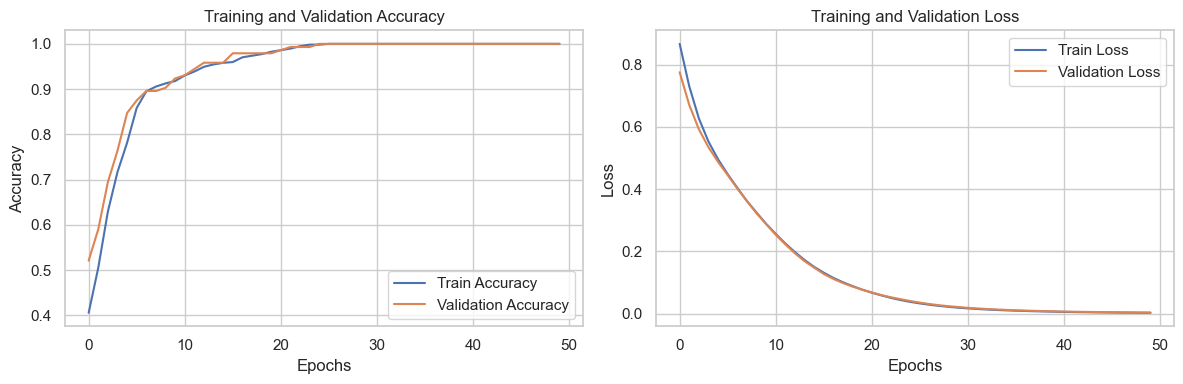

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


df['category'] = df['category'].astype('category')
df['category'] = df['category'].cat.codes

# One-hot encode the categorical column
df_encoded = pd.get_dummies(df, columns=['category'])

feature_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'high_traffic',
                   'category_0', 'category_1', 'category_2', 'category_3', 'category_4',
                   'category_5', 'category_6', 'category_7', 'category_8', 'category_9', 'category_10']
target_column = 'high_traffic'

# Extract features and target variable
X = df_encoded[feature_columns]
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using 'sigmoid' in the output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)



# Predict the values for X_test_scaled
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Combine true labels and predicted values into a DataFrame for better comparison
result_df = pd.DataFrame({'True Labels': y_test.values, 'Predicted Probabilities': y_pred_probs.flatten(), 'Predicted Labels': y_pred.flatten()})

# Print the DataFrame
print(result_df)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nTest Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()




The neural network model, based on the resulting metrics, clearly outperforms other modeling approaches, making it the clear choice for the given task.

# **Results: **

"This model has not only met but exceeded our primary business objective by achieving an Precision and accuracy of more than 80%. Its remarkable performance in predicting recipes that drive high traffic underscores its effectiveness. This accomplishment not only showcases the model's reliability but also positions it as a powerful tool for optimizing content and significantly enhancing user engagement with high-traffic recipes."

# **Recomendations**
"You may consider conducting a pilot test by running the model to assess its performance and identify any potential strengths and weaknesses. Additionally, providing more information about the recipe, such as the estimated preparation time and required devices, can enhance the user experience. Considering factors like the time of recipe upload could also be crucial for optimizing user engagement. Collecting feedback during the pilot test will be invaluable for making further improvements and tailoring the model to better meet user needs."